# START

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df = pd.read_csv('spam.csv', encoding='latin-1') # had an error so I used "encoding='latin-1'" to ignore error

In [123]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [125]:
df.columns=['Type','Text','v1','v2','v3']
df.head()

,Type,Text,v1,v2,v3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [126]:
# last 3 columns are unnecessory

# df = pd.read_csv('spam.csv', usecols=[0,1], encoding='latin-1')
# df.columns=['Type','Text']
# df.head()

# OR

df = df.drop(columns=['v1','v2','v3'])

In [127]:
df.head()

,Type,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [129]:
df['Type'].value_counts()

Type
ham     4825
spam     747
Name: count, dtype: int64

**We have 2 Types of values in first column. 1. ham and 2. spam**

In [130]:
# Convert labels to binary (0 for ham, 1 for spam)
# df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

# OR

# change ham and spam into 0 and 1.
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

df['Type'] = encode.fit_transform(df['Type'])
df.head()

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [131]:
# check for duplication
df.duplicated().sum()

403

In [132]:
# remove duplication
df = df.drop_duplicates(keep='first') 

# Only the first occurrence of each set of identical rows is kept in the resulting DataFrame.
# Subsequent occurrences of the same set of values are considered duplicates and are removed.

# check for duplication
df.duplicated().sum()

0

In [133]:
df.tail()
# 403 rows are droped but the index numbers are still same
# means rows have removed but indexs are still same(non continuous. eg: 1,2,5,9,11,12,13 etc)

,Type,Text
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [134]:
# Reset index to get exact and continuous index number
df.reset_index(drop=True)

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...
5165,0,Will Ì_ b going to esplanade fr home?
5166,0,"Pity, * was in mood for that. So...any other s..."
5167,0,The guy did some bitching but I acted like i'd...


**Before reset_index it was 5571 rows. After we reset index it is 5169 rows. Means 5,572-403 = 5,169**

# Visualisation

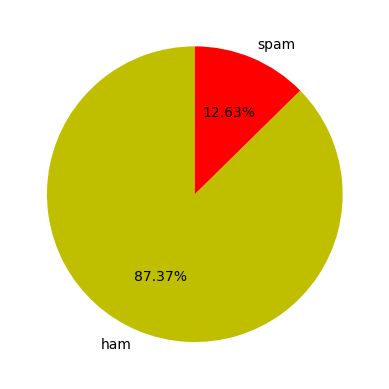

In [135]:
# pie chart of Type column
plt.pie(df['Type'].value_counts(), labels=['ham','spam'], autopct='%0.2f%%', colors=['y','r'], startangle=90)
plt.show()

**We have 87% ham data and 12% spam data**

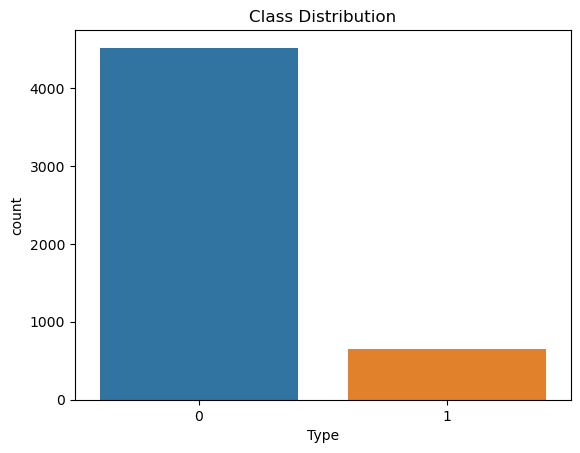

In [136]:
# Check class distribution
sns.countplot(x='Type', data=df)
plt.title('Class Distribution')
plt.show()

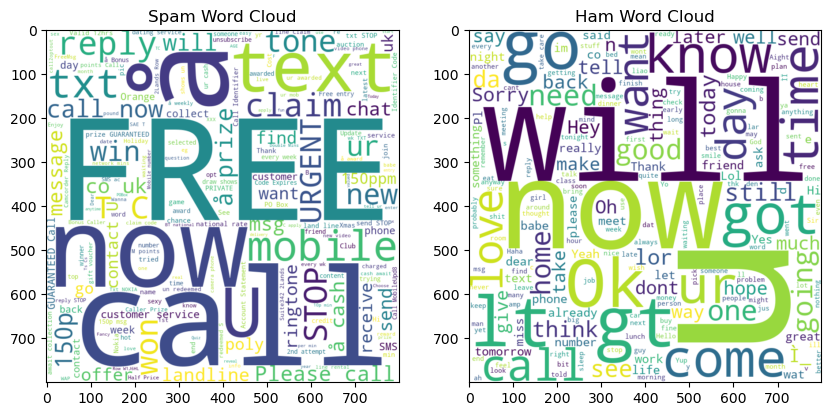

In [137]:
# Visualize word cloud for spam and ham
from wordcloud import WordCloud

spam_words = ' '.join(df[df['Type'] == 1]['Text'])
ham_words = ' '.join(df[df['Type'] == 0]['Text'])

spam_cloud = WordCloud(width=800, height=800, max_words=200, background_color='white').generate(spam_words)
ham_cloud = WordCloud(width=800, height=800, max_words=200, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_cloud, interpolation='bilinear')
plt.title('Spam Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(ham_cloud, interpolation='bilinear')
plt.title('Ham Word Cloud')

plt.show()

# Model Train

In [140]:
# Data Preprocessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['Text'],df['Type'],
                                                  test_size=0.2, random_state=123)
x_train.shape, x_test.shape

((4135,), (1034,))

In [141]:
# Feature Extraction (Vectorization)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

x_train_vectorized = vectorizer.fit_transform(x_train) 
x_test_vectorized = vectorizer.transform(x_test)

In [142]:
# Model Training
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_vectorized, y_train)

MultinomialNB()

In [143]:
# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = model.predict(x_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.99
Confusion Matrix:
[[886   2]
 [ 11 135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       888
           1       0.99      0.92      0.95       146

    accuracy                           0.99      1034
   macro avg       0.99      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034



# Best Model

In [149]:
# Data preprocessing and checking best random_state value from 1000
scores = []
for i in range(1000):
#     from sklearn.model_selection import train_test_split
    
    x_train, x_test, y_train, y_test = train_test_split(df['Text'],df['Type'],
                                                      test_size=0.2, random_state=i)
    
    # Feature Extraction (Vectorization)
#     from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer()

    x_train_vectorized = vectorizer.fit_transform(x_train) 
    x_test_vectorized = vectorizer.transform(x_test)
    
    # Model Training
#     from sklearn.naive_bayes import MultinomialNB

    model = MultinomialNB()
    model.fit(x_train_vectorized, y_train)
    
    # Model Evaluation
#     from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

    # Predictions
    y_pred = model.predict(x_test_vectorized)
    
    scores.append(accuracy_score(y_test,y_pred))

print('Best random_state value with highest accuracy: ',np.argmax(scores))
print('Best Accuracy: ', scores[np.argmax(scores)])

Best random_state value with highest accuracy:  17
Best Accuracy:  0.9941972920696325


# Check Model

In [150]:
# Test
def spam_ham_check(Text):
    feature = vectorizer.transform(Text)
    # Make prediction
    predict = model.predict(feature)

    result = 'Spam' if predict[0] == 1 else 'Ham'
    print('The text is classified as',result)

In [151]:
# check new values
test_input_msg_1 = ["hi how are you doing"]
test_input_msg_2 = ["Congratulations! You have won a bicycle."]
test_input_msg_3 = ["i am going home. Do you wanna come?"]
test_input_msg_4 = ["Congratulations! You've won a free vacation. Click here to claim your prize."]

spam_ham_check(test_input_msg_1)
spam_ham_check(test_input_msg_2)
spam_ham_check(test_input_msg_3)
spam_ham_check(test_input_msg_4)

The text is classified as Ham
The text is classified as Spam
The text is classified as Ham
The text is classified as Spam


# END